In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_books(page_num):
    url = f"https://www.goodreads.com/list/show/1.Best_Books_Ever?page={page_num}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('tr')

    book_info = {
        'title': [],
        'author': [],
        'avg_rating': [],
        'num_ratings': [],
        'num_reviews': [],
        'book_url': []
    }

    for book in books:
        title = book.find('a', class_='bookTitle').text.strip()
        author = book.find('a', class_='authorName').text.strip()
        avg_rating = book.find('span', class_='minirating').text.strip().split()[0]
        num_ratings = book.find_all('a', href='#')[1].text.strip().split()[0]
        num_reviews = book.find_all('a', href='#')[2].text.strip().split()[0]
        book_url = "https://www.goodreads.com" + book.find('a', class_='bookTitle')['href']

        book_info['title'].append(title)
        book_info['author'].append(author)
        book_info['avg_rating'].append(avg_rating)
        book_info['num_ratings'].append(num_ratings)
        book_info['num_reviews'].append(num_reviews)
        book_info['book_url'].append(book_url)

    return pd.DataFrame(book_info)

# Ask the user for a page number
page_num = input("Enter a page number: ")
df = scrape_books(page_num)

/Users/vineethsai/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df

,title,author,avg_rating,num_ratings,num_reviews,book_url
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,"38,234",1,https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,"31,512",1,https://www.goodreads.com/book/show/2.Harry_Po...
2,Pride and Prejudice,Jane Austen,4.29,"27,416",1,https://www.goodreads.com/book/show/1885.Pride...
3,To Kill a Mockingbird,Harper Lee,4.26,"24,639",1,https://www.goodreads.com/book/show/2657.To_Ki...
4,The Book Thief,Markus Zusak,4.39,"18,438",1,https://www.goodreads.com/book/show/19063.The_...
...,...,...,...,...,...,...
95,The Complete Stories and Poems,Edgar Allan Poe,4.39,"3,379",1,https://www.goodreads.com/book/show/23919.The_...
96,Interview with the Vampire (The Vampire Chroni...,Anne Rice,4.02,"3,286",1,https://www.goodreads.com/book/show/43763.Inte...
97,Don Quixote,Miguel de Cervantes Saavedra,3.90,"3,311",1,https://www.goodreads.com/book/show/3836.Don_Q...
98,The Poisonwood Bible,Barbara Kingsolver,4.10,"3,152",1,https://www.goodreads.com/book/show/7244.The_P...


In [4]:
# Data cleaning
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df['num_ratings'] = pd.to_numeric(df['num_ratings'].str.replace(',', ''), errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'].str.replace(',', ''), errors='coerce')
df.head(10)

,title,author,avg_rating,num_ratings,num_reviews,book_url
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,38234,1,https://www.goodreads.com/book/show/2767052-th...
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,31512,1,https://www.goodreads.com/book/show/2.Harry_Po...
2,Pride and Prejudice,Jane Austen,4.29,27416,1,https://www.goodreads.com/book/show/1885.Pride...
3,To Kill a Mockingbird,Harper Lee,4.26,24639,1,https://www.goodreads.com/book/show/2657.To_Ki...
4,The Book Thief,Markus Zusak,4.39,18438,1,https://www.goodreads.com/book/show/19063.The_...
5,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.65,16975,1,https://www.goodreads.com/book/show/41865.Twil...
6,Animal Farm,George Orwell,3.99,16003,1,https://www.goodreads.com/book/show/170448.Ani...
7,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.61,15308,1,https://www.goodreads.com/book/show/30.J_R_R_T...
8,The Chronicles of Narnia (The Chronicles of Na...,C.S. Lewis,4.27,14908,1,https://www.goodreads.com/book/show/11127.The_...
9,The Fault in Our Stars,John Green,4.14,13644,1,https://www.goodreads.com/book/show/11870085-t...


/Users/vineethsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


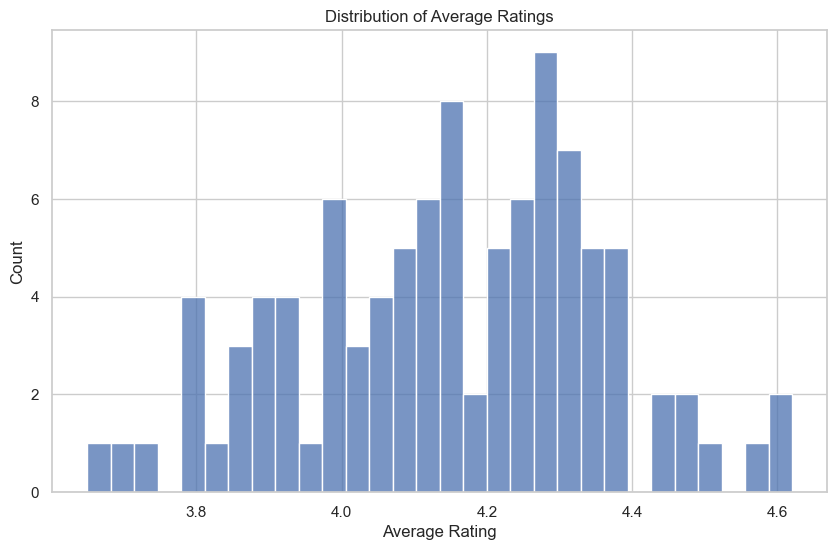

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create a histogram of average ratings
plt.figure(figsize=(10,6))
sns.histplot(df['avg_rating'], kde=False, bins=30)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()



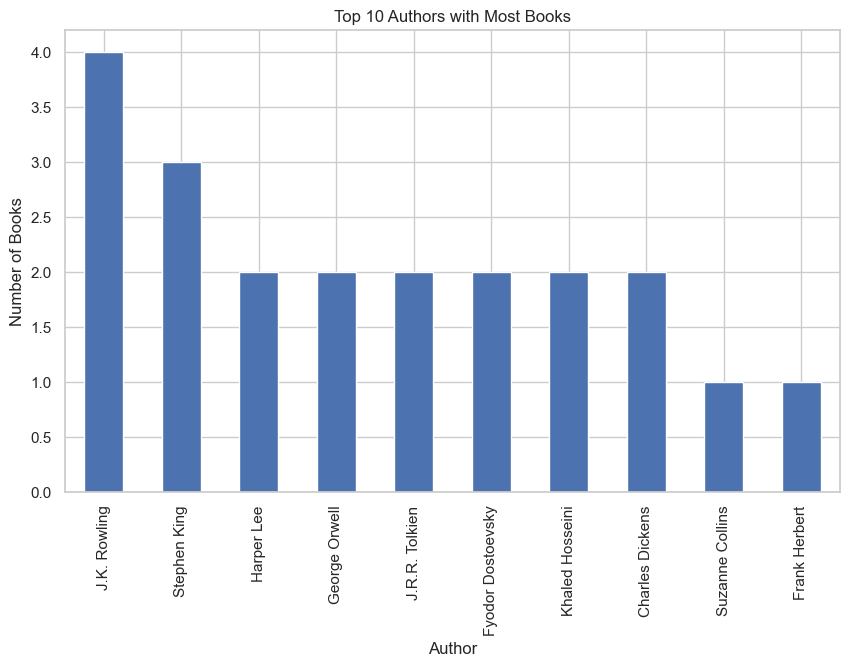

In [6]:
# Create a bar plot of the top 10 authors with the most books
plt.figure(figsize=(10,6))
df['author'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()



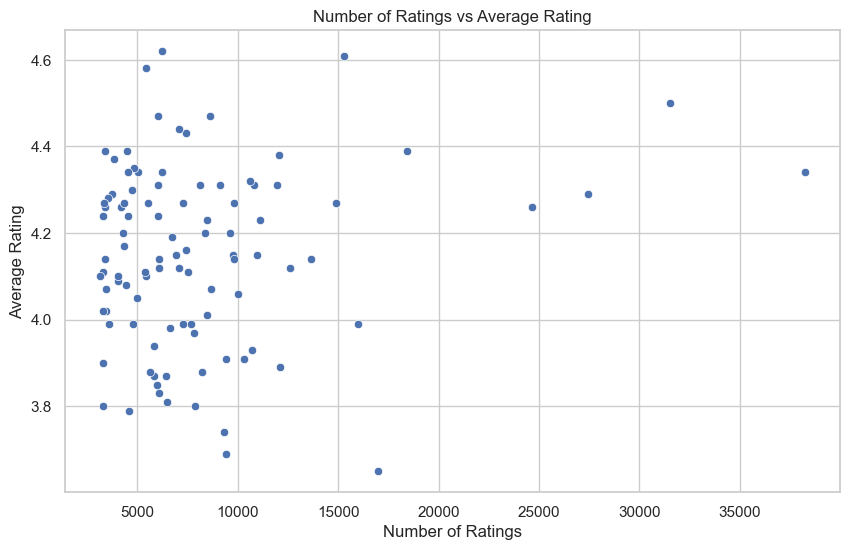

In [7]:
# Create a scatter plot of number of ratings vs average rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_ratings', y='avg_rating', data=df)
plt.title('Number of Ratings vs Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()



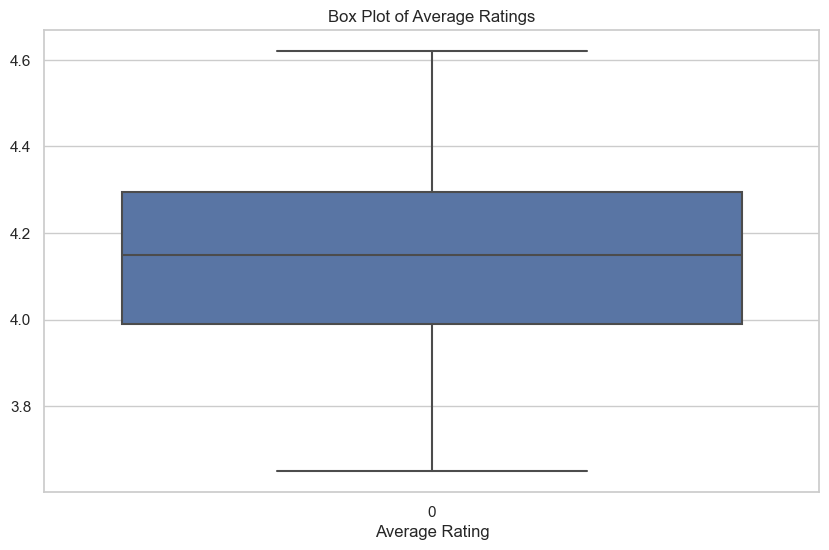

In [8]:
# Create a box plot of average ratings
plt.figure(figsize=(10,6))
sns.boxplot(df['avg_rating'])
plt.title('Box Plot of Average Ratings')
plt.xlabel('Average Rating')
plt.show()

In [9]:
# Perform data cleaning, analysis, and visualizations

# Generate an HTML report
html = df.to_html()
with open('report.html', 'w') as f:
    f.write(html)

In [11]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Convert 'num_ratings' and 'num_reviews' to numeric
df['num_ratings'] = pd.to_numeric(df['num_ratings'].astype(str).str.replace(',', ''), errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'].astype(str).str.replace(',', ''), errors='coerce')
# Drop rows with missing values
df = df.dropna()

# Split the data into features (X) and target (y)
X = df[['num_ratings', 'num_reviews']]
y = df['avg_rating']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's R^2 score
print(model.score(X_test, y_test))

0.05377304494995494


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's R^2 score
print(model.score(X_test, y_test))

-0.7296313858127403
